# U.S. Medical Insurance Costs

Analysing the Medical Insurace Cost Personal Dataset from kaggle: https://www.kaggle.com/datasets/mirichoi0218/insurance

## Import libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

from sklearn.inspection import permutation_importance


## Data exploration

In [2]:
#load the dataset

df = pd.read_csv('data/insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### check & drop the duplicated rows

In [6]:
df.duplicated().sum()

1

In [7]:
df = df.drop_duplicates()
df.shape

(1337, 7)

### check & handle missing data

In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
# no missing data

#### check outliers

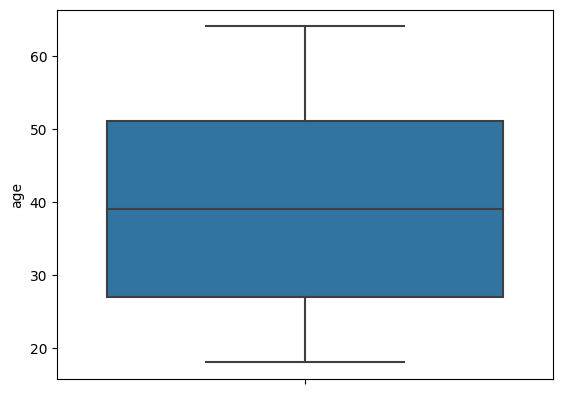

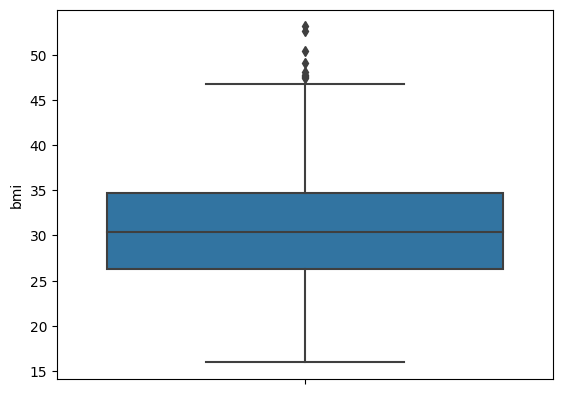

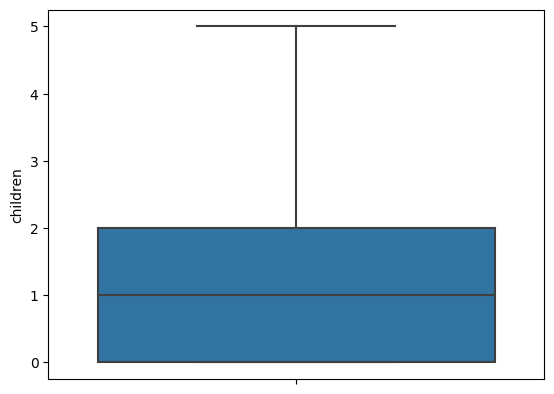

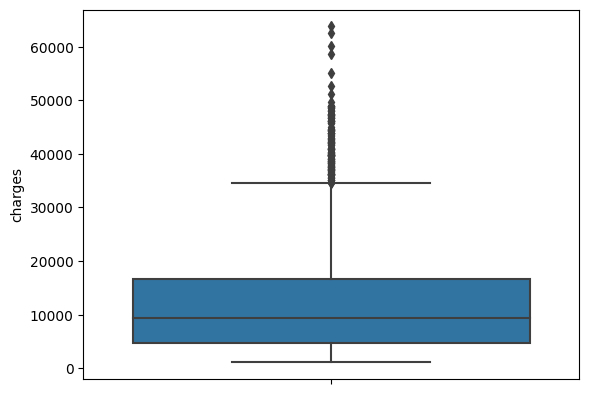

In [10]:
for col in df.columns:
    if df[col].dtype != object:
        sns.boxplot(y = col, data= df)
        plt.show()

- *bmi* & *charges* columns contain few outliers, but it looks like valid/possible values. Therefore decided to keep them in the dataset for now.

In [11]:
#inspect the values

df.describe().style.format('{:.3f}')

,age,bmi,children,charges
count,1337.000,1337.000,1337.000,1337.000
mean,39.222,30.663,1.096,13279.121
std,14.044,6.100,1.206,12110.360
min,18.000,15.960,0.000,1121.874
25%,27.000,26.290,0.000,4746.344
50%,39.000,30.400,1.000,9386.161
75%,51.000,34.700,2.000,16657.717
max,64.000,53.130,5.000,63770.428


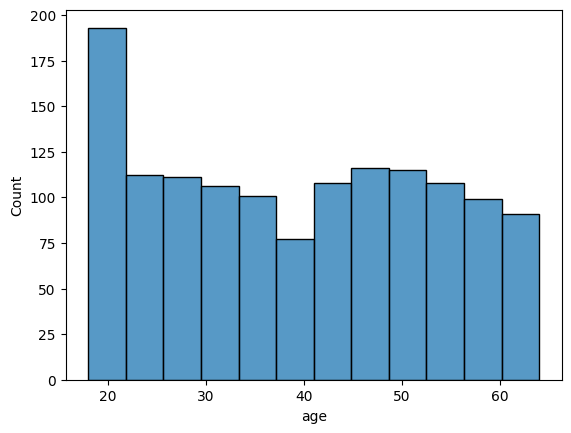

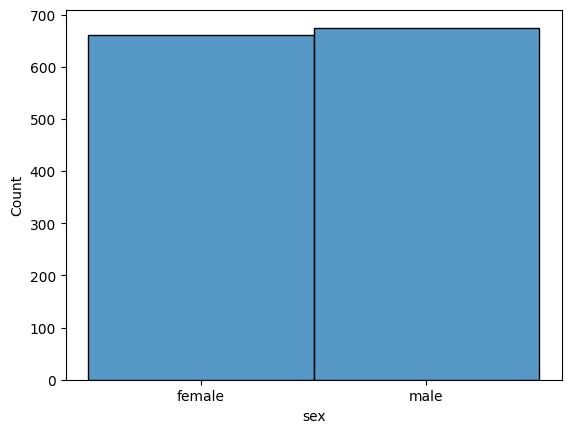

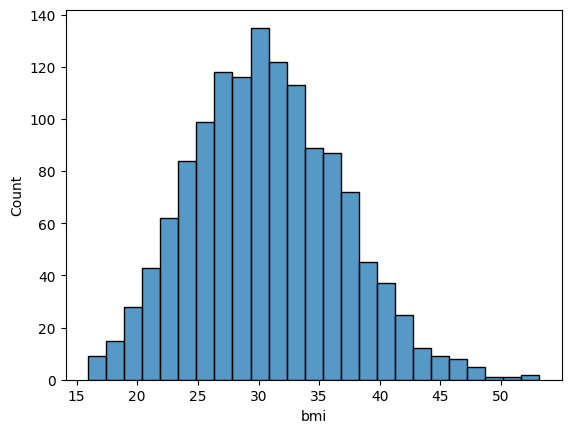

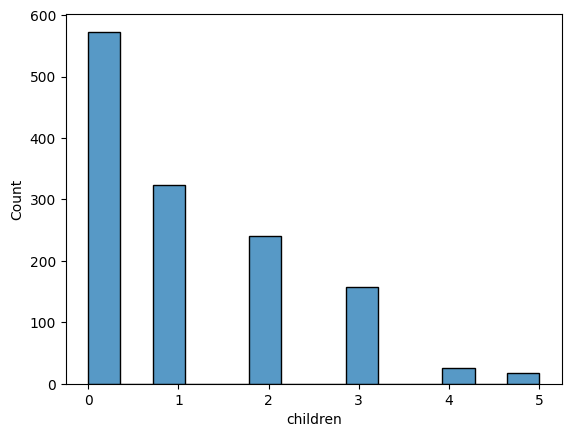

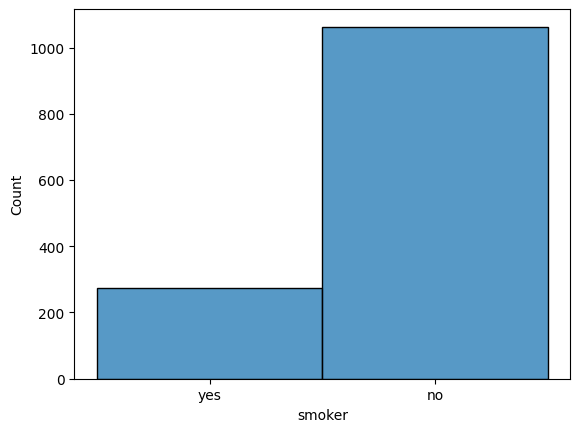

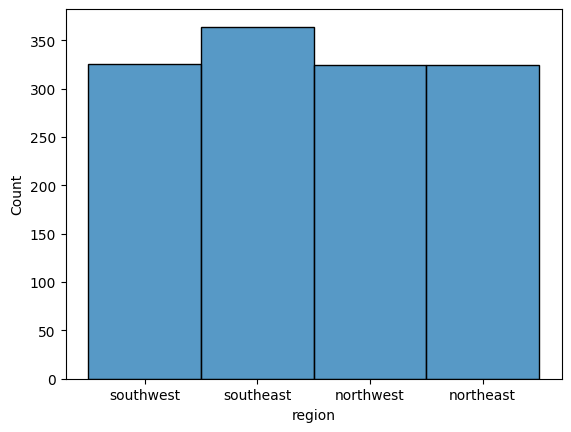

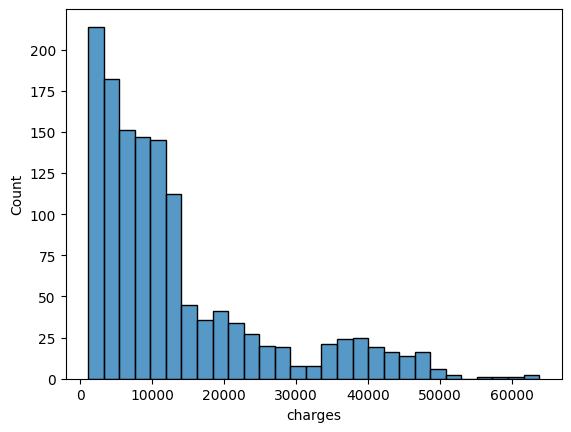

In [12]:
#exploring distribution of all columns

for col in df.columns:
    sns.histplot(df, x = col)
    plt.show()

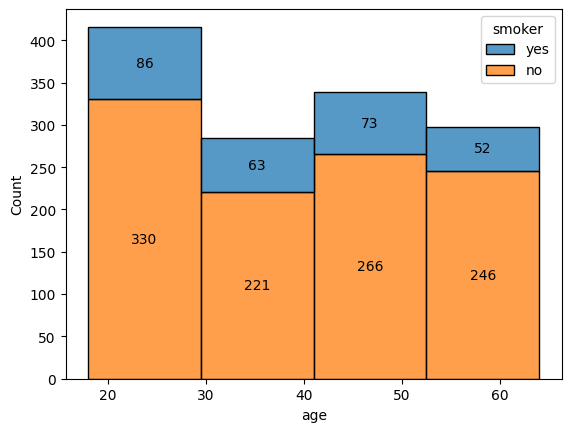

In [13]:
#exploring the proportion of smokers for different age groups

ax_age = sns.histplot(df, x='age', bins=4, hue = 'smoker', multiple='stack', legend= True)

for bars in ax_age.containers:
    labels = [int(b.get_height()) for b in bars]
    ax_age.bar_label(bars, labels=labels, label_type='center')
plt.show()

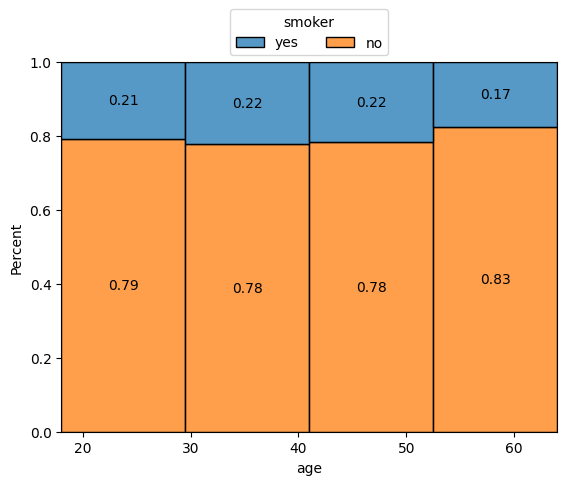

In [14]:
#exploring the percentage of smokers for different age groups

ax_age_percentage = sns.histplot(df, x='age', bins=4, hue = 'smoker', multiple='fill', legend= True, stat='percent')

for bars in ax_age_percentage.containers:
    labels = [f'{b.get_height():.2f}' for b in bars]
    ax_age_percentage.bar_label(bars, labels=labels, label_type='center')

sns.move_legend(ax_age_percentage, 'lower center', bbox_to_anchor=(.5, 1), ncol=2)
plt.show()

## Preparing data set for modelling

In [15]:
X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = df['charges']

### Endocing categorical values

In [16]:
encoder = OneHotEncoder(sparse_output=False, drop='if_binary')

encoder.fit(X[['sex', 'smoker', 'region']])

X[list(encoder.get_feature_names_out())] = encoder.transform(X[['sex', 'smoker', 'region']])

X.head()

,age,sex,bmi,children,smoker,region,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,southwest,0.0,1.0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1.0,0.0,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,1.0,0.0,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,1.0,0.0,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,1.0,0.0,0.0,1.0,0.0,0.0


In [17]:
X = X.drop(columns=['sex', 'smoker', 'region'])

X.head()

,age,bmi,children,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,1.0,0.0,0.0,1.0,0.0,0.0


### Scaling

In [18]:
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


X_scaled

,age,bmi,children,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0.021739,0.321227,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.000000,0.479150,0.2,1.0,0.0,0.0,0.0,1.0,0.0
2,0.217391,0.458434,0.6,1.0,0.0,0.0,0.0,1.0,0.0
3,0.326087,0.181464,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.304348,0.347592,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1332,0.695652,0.403820,0.6,1.0,0.0,0.0,1.0,0.0,0.0
1333,0.000000,0.429379,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1334,0.000000,0.562012,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1335,0.065217,0.264730,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Base Modeling

In [19]:
base_model = LinearRegression()
base_model_cv = cross_validate(base_model, X_scaled, y, cv=3)

base_model_score = base_model_cv['test_score'].mean()
base_model_score

0.7440831111844325

## Feature permutation

In [20]:
model = LinearRegression()
model.fit(X_scaled,y)

r = permutation_importance(model, X_scaled, y, n_repeats=10)

r.keys()

dict_keys(['importances_mean', 'importances_std', 'importances'])

In [21]:
importances = pd.DataFrame(np.vstack((X_scaled.columns, r['importances_mean'])).T)

In [22]:
importances.columns = ['feature', 'importance_mean']
importances.sort_values('importance_mean', ascending=False)

,feature,importance_mean
4,smoker_yes,1.275299
0,age,0.180028
1,bmi,0.05955
2,children,0.005225
5,region_northeast,0.000749
7,region_southeast,0.000617
8,region_southwest,0.000224
6,region_northwest,0.000146
3,sex_male,0.000006


## Modeling with less complexity

In [23]:
X_simplified = X_scaled[['smoker_yes', 'age', 'bmi', 'children']]

simplified_model = LinearRegression()

simplified_cv = cross_validate(simplified_model, X_simplified, y, cv=3)
simplified_model_score = simplified_cv['test_score'].mean()
simplified_model_score, base_model_score

(0.748110344800026, 0.7440831111844325)

-> we were able to keep the score close to the baseline score when dropping the not so relevant features (location, sex)